QUIERO:

dos dropdowns (esto ya esta)
abajo, 3 radares: los dos que ya estaban y otro mas con los radares combinado (superpuesto) (para esto os hara falta cambiar la funcion de hacer el radar).

abajo, dos outputs mas con las imagenes de cada bicho que hemos sacado con el nombre y llamando a la api: https://pokeapi.co/api/v2/pokemon/bulbasaur/

In [15]:
#!pip install ipywidgets


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as w
from IPython.display import clear_output
from io import BytesIO
from PIL import Image
import requests
from IPython.display import display, Image as IPImage

In [17]:
df = pd.read_csv("data/Pokemon.csv")
df = df.iloc[:,1:]

In [18]:
df

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...
146,Dratini,Dragon,NaN,300,41,64,45,50,50,50,1,False
147,Dragonair,Dragon,NaN,420,61,84,65,70,70,70,2,False
148,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,3,False
149,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True


In [19]:
df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].max().max()

np.int64(250)

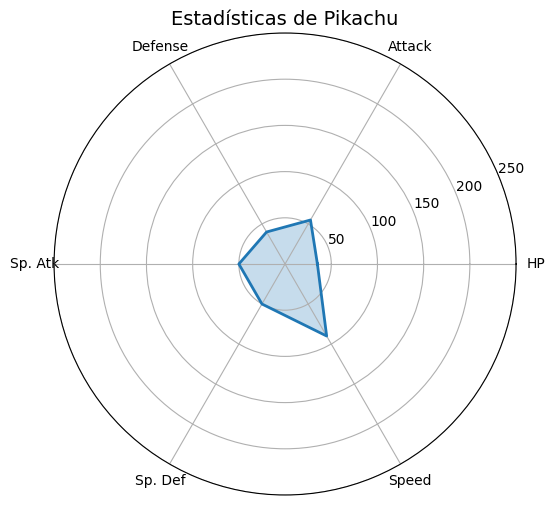

In [20]:

def mostrar_radar_pokemon(nombre_pokemon,ax=None, color='blue', alpha=0.25):
    # Buscar el Pokémon
    pokemon = df[df['Name'].str.lower() == nombre_pokemon.lower()]
    
    if pokemon.empty:
        print(f"No se encontró el Pokémon '{nombre_pokemon}'.")
        return
        
        
    stats = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
    valores = pokemon[stats].values.flatten().tolist()
    
    # Cerrar el círculo del radar chart
    valores += [valores[0]]
    
    # Calcular ángulos
    num_vars = len(stats)
    angulos = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angulos += [angulos[0]]
    
    #Crear radar chart si no se da eje
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
        ax.plot(angulos, valores, linewidth=2)
        ax.fill(angulos, valores, alpha=0.25)

    # Configurar etiquetas
    ax.set_xticks(angulos[:-1])
    ax.set_xticklabels(stats)
    ax.set_ylim(None, 250)
    ax.set_title(f"Estadísticas de {pokemon['Name'].values[0]}", size=14)
    plt.show()

# Ejemplo de uso
mostrar_radar_pokemon("Pikachu")

https://ipywidgets.readthedocs.io/en/8.1.5/examples/Widget%20List.html

In [21]:
drop1 = w.Dropdown(options=df.Name.unique())
drop2 = w.Dropdown(options=df.Name.unique())
out1 = w.Output()
out2 = w.Output()
out3 = w.Output()
out4 = w.Output()
out5 = w.Output()


In [ ]:
def on_pokemon_ch mostrar_radar_pokemon(nuevo_pokemon)ange1(change):
    if change['type'] == 'change' and change['name'] == 'value':
        nuevo_pokemon = change['new']
        link = requests.get(f'https://pokeapi.co/api/v2/pokemon/{nuevo_pokemon}/', stream=True)
        link_img = requests.get(link.json()["sprites"]['front_default'], stream=True)
        
        with out1:
            clear_output(wait=True)
        with out3:
            clear_output(wait=True)
            display(IPImage(data=link_img.content,width=500, height=500))

def on_pokemon_change2(change):
    if change['type'] == 'change' and change['name'] == 'value':
        nuevo_pokemon = change['new']
        link = requests.get(f'https://pokeapi.co/api/v2/pokemon/{nuevo_pokemon}/', stream=True)
        link_img = requests.get(link.json()["sprites"]['front_default'], stream=True)
        
        with out2:
            clear_output(wait=True)
            mostrar_radar_pokemon(nuevo_pokemon)
        with out4:
            clear_output(wait=True)
            display(IPImage(data=link_img.content,width=500, height=500))


In [ ]:
# def change_comparativa(nombre_pokemon1, nombre_pokemon2):
    
#     with out5:
#         clear_output(wait=True)
#         fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
#         mostrar_radar_pokemon(nombre_pokemon1, ax, color='blue', alpha=0.5)
#         mostrar_radar_pokemon(nombre_pokemon2, ax, color='red', alpha=0.5)
#         ax.set_title(f"{nombre_pokemon1} (Azul) VS {nombre_pokemon2} (Rojo)", size=14, y=1.1)
#         plt.show()

# def actualizar_comparativa(change):
#     if drop1.value and drop2.value:
#         change_comparativa(drop1.value, drop2.value)

In [ ]:
caja_up = w.HBox([drop1, drop2], layout=w.Layout(justify_content='space-between') )
caja_radar = w.HBox([out1,out5, out2], layout=w.Layout(justify_content='space-between') )
caja_img = w.HBox([out3, out4], layout=w.Layout(justify_content='space-between') )


display(w.VBox([caja_up, caja_radar, caja_img]))

drop1.observe(on_pokemon_change1)
drop2.observe(on_pokemon_change2)


In [25]:
# import ipywidgets.widgets as w
dd = w.Dropdown(options=["a", "b", "tupri"])
out = w.Output()




def buscatupri(change):
    if change['type'] == 'change' and change['name'] == 'value':
        if change['new'] == "tupri":
            with out:
                print("Iujuuuuuu!")



dd.observe(buscatupri)


display(dd, out)

Dropdown(options=('a', 'b', 'tupri'), value='a')

Output()

In [26]:
boton = w.Button(description="Click Me")
# out = w.Output()
click = 0
def saluda(boton):
    global click
    click +=1
    boton.description = f"Apretado {click} veces"
    

boton.on_click(saluda)


display(boton)

Button(description='Click Me', style=ButtonStyle())

In [27]:

# imag = requests.get('https://pokeapi.co/api/v2/pokemon/bulbasaur/',stream=True)
# imag.json()["sprites"]['front_default']
# url = imag.json()["sprites"]['front_default']

# respuesta_imagen = requests.get(url, stream=True)
# imagen = Image.open(BytesIO(respuesta_imagen.content))
# imagen.show()

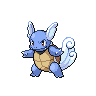

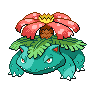

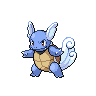

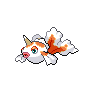

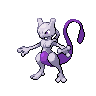

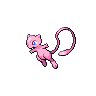

In [28]:
drop1 = w.Dropdown(options=df.loc[:, "Name"].unique())
drop2 = w.Dropdown(options=df.loc[:, "Name"].unique())

out1 = w.Output()
out2 = w.Output()


def mostrar_pokemon1(change):
    if change['type'] == 'change' and change['name'] == 'value':
        nombre_pokemon = change['new']
        link = requests.get(f'https://pokeapi.co/api/v2/pokemon/{nombre_pokemon}/', stream=True)
        link_img = requests.get(link.json()["sprites"]['front_default'], stream=True)
        display(IPImage(data=link_img.content,width=250, height=250))
        with out1:
            clear_output(wait=True)
            mostrar_radar_pokemon(nombre_pokemon)

def mostrar_pokemon2(change):
    if change['type'] == 'change' and change['name'] == 'value':
        nombre_pokemon = change['new']
        link = requests.get(f'https://pokeapi.co/api/v2/pokemon/{nombre_pokemon}/', stream=True)
        link_img = requests.get(link.json()["sprites"]['front_default'], stream=True)
        display(IPImage(data=link_img.content,width=250, height=250))
        with out2:
            clear_output(wait=True)
            mostrar_radar_pokemon(nombre_pokemon)



drop1.observe(mostrar_pokemon1)
drop2.observe(mostrar_pokemon2)


caja1 = w.HBox([drop1, drop2],  layout=w.Layout(justify_content='space-between') )
caja2 = w.HBox([out1, out2],  layout=w.Layout(justify_content='space-between') )

caja_final = w.VBox([caja1, caja2])

display(caja_final)